# **Lab Exercise: Linear and Logistic Regression**

## **Linear Regression Construction** 

#### **Section 1: Setting Up and Importing Libraries**
*Objective:* Load the required `Python libraries`.


In [7]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

#### **Section 2: Linear Regression Data Preparation**

*Objective:* Create a dataset for linear regression.

Task: Write the code to:

Create a dataset with features and target variables for linear regression.
Visualize the data using Matplotlib.


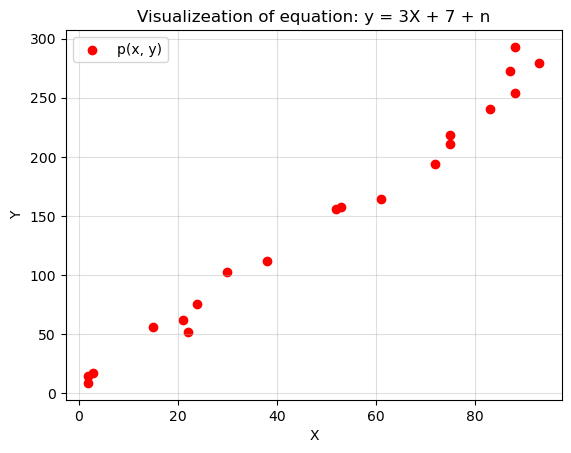

In [5]:
# Generate synthetic data for linear regression
np.random.seed(42)  # For reproducibility
X = np.random.randint(1, 100, 20)  # Features (independent variable)
y = 3 * X + 7 + np.random.normal(0, 15, 20)  # Target with noise

# Visualize the data

# You need to use scatter chart to Visualize the input dataset X & y
# Your chart need to label the x-axis, y-axis and title
# Your chart should use grid

plt.xlabel('X')
plt.ylabel('Y')
plt.title("Visualizeation of equation: y = 3X + 7 + n")
plt.scatter(X, y, color='red', label='p(x, y)')
plt.grid(alpha=0.4)
plt.legend()
plt.show()



# Your code


#### **Section 3: Implementing Linear Regression**

*Objective:* Practice linear regression construction.

Task: Write the code to:

Write a Linear Regression function to minimize the cost function and find the optimal parameters.


For **Undergraduate students** (CS457): You can **choose** any of the following methods to implement it.
1. You can use any scikit-learn library.
2. Manually write cost function & gradient descent function to implement it.

For **Graduate students** (CS557): You have to implement it by
1. Manually write cost function & gradient descent function to implement it.


In [14]:
# Your code for linear regression model

# Sklearn model
from sklearn import linear_model

# Prepare data

x_train = np.reshape(X, (-1,1))
y_train = np.reshape(y, (-1,1))

# Building the Model

reg = linear_model.LinearRegression()
reg.fit(x_train, y_train)

# Review Model parameter 


# y = mx + b
# m = reg.coef_, b = reg.intercept_
theta = np.array([reg.intercept_[0], reg.coef_[0][0]]) # theta[0] = intercept, theta[1] = slope
print(theta)


[3.13756608 2.92415997]


In [72]:
# Your code for linear regression model

# Manually write cost function & gradient descent 

# Reshape X to include a bias term (column of ones for the intercept) by np.column_stack
# your code

# Define the cost function for linear regression
def compute_cost(X, y, theta):
    """
    Compute the cost function for linear regression.
    """
    # your code 
    m = len(y)
    
    return np.sum(pow(np.dot(X, theta) - y, 2))/(2*m)
    
    return cost
    
   

# Define the gradient descent function
def gradient_descent(X, y, alpha, iterations):
    """
    Perform gradient descent to minimize the cost function.
    """

    theta = np.zeros(2)  # Initialize theta (matching number of features)
    m = len(y)  # Number of training examples
    
    for i in range(iterations):
        t0 = theta[0] - (alpha / m) * np.sum(np.dot(X, theta) - y)
        t1 = theta[1] - (alpha / m) * np.sum((np.dot(X, theta) - y) * X[:,1])

        theta = np.array([t0, t1])
    # Iterate to update theta with iterations
    # your code 


    return theta
    


# Number of iterations for gradient descent
iterations = 5000

# Learning rate for gradient descent
alpha = 0.0001

x = np.column_stack((np.ones(len(X)), X))

# Call the gradient descent function to compute optimized parameters
theta = gradient_descent(x, y, alpha, iterations)

# Compute the cost using the optimized parameters
cost = compute_cost(x, y, theta)

# Print the results
print("Optimized theta (parameters):", theta)  # Optimized values for theta (intercept and slope)
print("Final cost:", cost)  # Final cost value to evaluate the fit

Optimized theta (parameters): [0.46266464 2.96267244]
Final cost: 69.69441359034002


### **Section 4: Visualizing the Linear Regression Line**

*Objective:* Plot the regression line with the original data.

Task: Plot the data points and the fitted regression line.

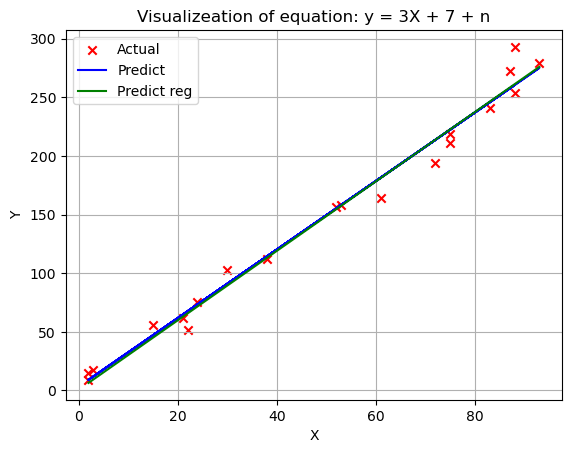

In [75]:
# Compare predictions with actual values

samples = np.linspace(np.min(X), np.max(X))

# actual
plt.xlabel('X')
plt.ylabel('Y')
plt.title("Visualizeation of equation: y = 3X + 7 + n")
plt.scatter(X, y, marker='x', color='red', label='Actual')

# LinearRegression()
plt.plot(x_train, reg.predict(x_train), color='blue', label='Predict')
plt.plot(samples, theta[0] + theta[1]*samples, color='green', label='Predict reg')
plt.grid()
plt.legend()
plt.show()

# Plot the data and regression line
# You need to use scatter chart to Visualize the input dataset X & y
# Your chart should plot the regression line using theta_optimal predictions 
# Your chart need to label the x-axis, y-axis and title
# Your chart should use grid
# Please add your name to the graph title

# Your code: 

## **Logistic Regression Construction** 

#### **Section 1: Logistic Regression Data Preparation**

*Objective:* Prepare data for logistic regression.

Task: Write the code to:

Create synthetic data for binary classification.
Visualize the data.

#### Dataset Description

Study_hour_Data.csv - The dataset simulates a scenario where students' chances of passing a course are influenced by their study habits and class participation. It contains 200 observations and the following three columns:


**Hours of Study:**
Integer values representing the number of hours a student spends studying in a week.
Range: 0 to 9.

**Class Participation:**
Float values between 0 and 1, representing the level of engagement in class activities.
Higher values indicate greater participation.

**Passed:**
Binary target variable indicating whether the student passed the course:
1: Passed.
0: Did not pass.
Determined based on a weighted combination of Hours of Study and Class Participation (with added noise), with a threshold value of 5.

In [22]:
import pandas as pd
#read data from Pandas 

# Load dataset
# please use Study_hour_Data.csv as your target data
data = pd.read_csv('Study_hour_Data.csv') # your code

# Display basic information
print(data.info())
print(data.describe())


#Generate your training data X & y
X =  data[['Hours of Study']].values #use column Hours of Study
y =  data.Passed.values #data['Passed'].values #use columns Passed

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 3 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Hours of Study       200 non-null    int64  
 1   Class Participation  200 non-null    float64
 2   Passed               200 non-null    int64  
dtypes: float64(1), int64(2)
memory usage: 4.8 KB
None
       Hours of Study  Class Participation      Passed
count      200.000000           200.000000  200.000000
mean         4.115000             0.505828    0.750000
std          2.751295             0.289315    0.434099
min          0.000000             0.009934    0.000000
25%          2.000000             0.248919    0.750000
50%          4.000000             0.492630    1.000000
75%          6.000000             0.771555    1.000000
max          9.000000             0.992191    1.000000


#### **Section 2: Visualize the data**

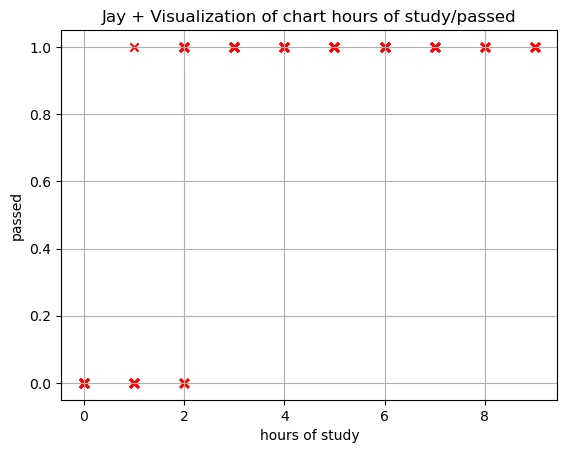

In [25]:
# Visualize the data

# You need to use scatter chart to Visualize the input dataset X & y
# Your chart need to label the x-axis, y-axis and title
# Your chart should use grid
# Please add your name to the graph title

# Your code: 

plt.xlabel('hours of study')
plt.ylabel('passed')
plt.title("Jay + Visualization of chart hours of study/passed")
plt.scatter(X, y, marker='x', color='red', label="passed")
plt.grid()
plt.show()



#### **Section 3: Implementing Logistic Regression**

*Objective:* Implement logistic regression.

For **Undergraduate students** (CS457): You can **choose** any of the following methods to implement it.
1. You can use any scikit-learn library.
2. Manually write cost function & gradient descent function to implement it. 

For **Graduate students** (CS557): You have to implement it by
1. Manually write cost function & gradient descent function to implement it.


Then, use the scipy.optimize library to fit the logistic regression model.

In [124]:
# Your code for logistic regression model

# Sklearn model
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
# Prepare data


X_train, X_test, y_train, y_test = train_test_split(X,y,train_size=0.8)


model = LogisticRegression()
model.fit(X_train, y_train)

# Review Model parameter

y_predict = model.predict(X_test)
prob = model.predict_proba(X_test)

40


In [136]:
# Your logistic regression model

# Define the sigmoid function
def sigmoid(z):
    return 1/(1+np.exp(-z))
    # pass
    
     

# Define the cost function for logistic regression
def cost_function(theta, X, y):
    m = len(y)
    h = sigmoid(X.dot(theta))
    # pass 

    cost = -(1/m) * (y.dot(np.log(h)) + (1-y).dot(np.log(1 - h)))
    return cost

# Define the gradient function
def gradient(theta, X, y):
    m = len(y)
    h = sigmoid(X.dot(theta))
    gradient = (1 / m) * X.T.dot(h-y)

    return gradient
    #pass
    

In [160]:
from scipy.optimize import minimize

# Train your model
def train(X, y):
    # Add a bias term (intercept) to X 
    X = np.column_stack((np.ones(len(X)), X))
    # Initialize theta (parameters) to zeros
    theta = np.zeros(X.shape[1])
    # Minimize the cost function using scipy.optimize
    result = minimize(fun=cost_function, x0=theta, args=(X,y), method='TNC', jac=gradient, options = {'maxfun': 4000})
    return result

theta = train(X_train, y_train)

theta_optimized = theta.x
intercept = theta_optimized[0]
coef = theta_optimized[1:]

# Print the optimized parameters (theta)
print("Optimized theta (parameters):", theta_optimized)

Optimized theta (parameters): [-7.41691286  3.97843991]


C:\Users\wodnj\AppData\Local\Temp\ipykernel_5048\589939268.py:16: RuntimeWarning: divide by zero encountered in log
  cost = -(1/m) * (y.dot(np.log(h)) + (1-y).dot(np.log(1 - h)))


#### **Section 4: Evaluate the model**

*Objective:* Evaluate the model with the fitted data.

Task: build the Predict function, and Calculate accuracy.

In [163]:
# Predict function
def predict(X, theta):
    probabilities = sigmoid(X.dot(theta))
    return (probabilities >= 0.5).astype(int)
    # your code
X_test_C = np.column_stack((np.ones(len(X_test)), X_test))

# Make predictions
predictions = predict(X_test_C, theta_optimized)

In [165]:
# Calculate accuracy
accuracy = np.mean(predictions == y_test) * 100
print("Accuracy:", accuracy, "%")

Accuracy: 92.5 %


### **Section 5: Visualizing Logistic Regression Fit**

*Objective:* Plot the logistic regression fit with the original data.

Task: Plot the sigmoid curve over the range of input features.

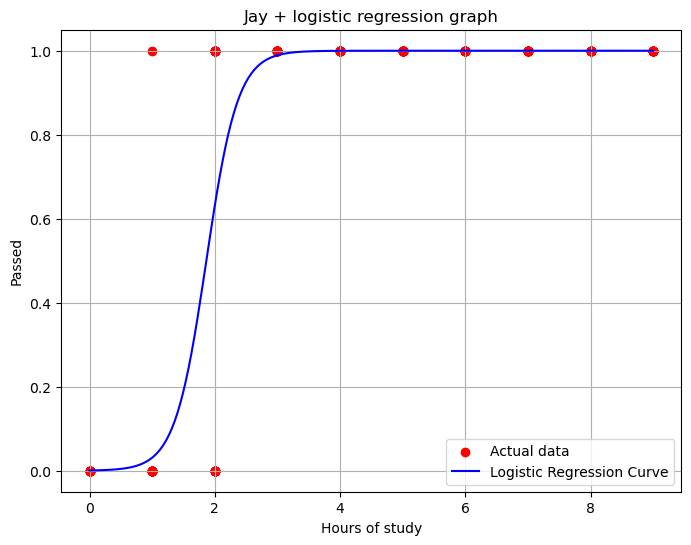

In [174]:
# Plot the data and regression line
# You need to use scatter chart to Visualize the input dataset X & y
# Your chart should plot the regression line using theta_optimal predictions 
# Your chart need to label the x-axis, y-axis and title
# Your chart should use grid
# Please add your name to the graph title

plt.figure(figsize=(8,6))

# scater plot of actual data
plt.scatter(X, y, color='red', label='Actual data')

# logistic regression curve
hours_of_study = np.linspace(X.min(), X.max(), 200).reshape(-1, 1)
X_range = np.column_stack((np.ones(len(hours_of_study)), hours_of_study))
probabilities = sigmoid(X_range.dot(theta_optimized))

plt.plot(hours_of_study, probabilities , color='blue', label='Logistic Regression Curve')

plt.xlabel('Hours of study')
plt.ylabel('Passed')
plt.title('Jay + logistic regression graph')

plt.legend()
plt.grid()
plt.show()

